<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [2]:
# datos
df = pd.read_csv('data/cookie_cats.csv')
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# transformacion

df1 = df.drop(labels='retention_7', axis=1)
print(df1.head(3))
df7 = df.drop(labels='retention_1', axis=1)
print(df7.head(3))

   userid  version  sum_gamerounds  retention_1
0     116  gate_30               3        False
1     337  gate_30              38         True
2     377  gate_40             165         True
   userid  version  sum_gamerounds  retention_7
0     116  gate_30               3        False
1     337  gate_30              38        False
2     377  gate_40             165        False


In [4]:
def to_binary(x):
    if x == True:
        return 1
    else:
        return 0

In [25]:
df1['ret_b'] = df1['retention_1'].apply(to_binary)
df7['ret_b'] = df7['retention_7'].apply(to_binary)

S1_30 = df1[df1['version']=='gate_30']['ret_b']
S1_40 = df1[df1['version']=='gate_40']['ret_b']

S7_30 = df7[df7['version']=='gate_30']['ret_b']
S7_40 = df7[df7['version']=='gate_40']['ret_b']

In [74]:
cross1 = pd.crosstab(df1.version, df1.ret_b)
cross1['ratio'] = (cross1[1]/cross1[0])
display(cross1)

ret_b,0,1,ratio
version,,,
gate_30,24666,20034,0.812211
gate_40,25370,20119,0.793023


In [76]:
cross7 = pd.crosstab(df7.version, df7.ret_b)
cross7['ratio'] = (cross7[1]/cross7[0])
display(cross7)

ret_b,0,1,ratio
version,,,
gate_30,36198,8502,0.234875
gate_40,37210,8279,0.222494


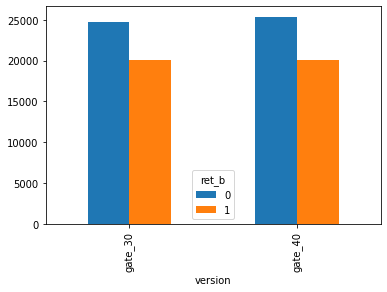

In [56]:
pd.crosstab(df1.version, df1.ret_b).plot(kind='bar');

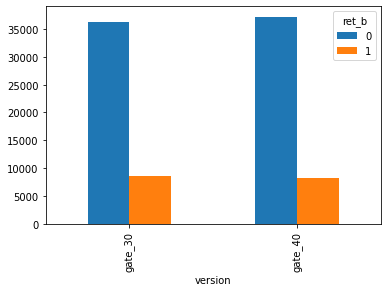

In [57]:
pd.crosstab(df7.version, df7.ret_b).plot(kind='bar');

In [28]:
display(S1_30.describe().T)
display(S1_40.describe().T)
display(S7_30.describe().T)
display(S7_40.describe().T)

count    44700.000000
mean         0.448188
std          0.497314
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ret_b, dtype: float64

count    45489.000000
mean         0.442283
std          0.496663
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ret_b, dtype: float64

count    44700.000000
mean         0.190201
std          0.392464
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ret_b, dtype: float64

count    45489.000000
mean         0.182000
std          0.385849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ret_b, dtype: float64

In [79]:
# testeo para retention_1
n_con=S1_30.count()   
n_trat=S1_40.count()

conversiones=[S1_30.sum(), S1_40.sum()]

observaciones=[n_con, n_trat]

z_score, p_value = proportions_ztest(conversiones, nobs=observaciones, alternative='smaller')

z_score, p_value

(1.7840862247974725, 0.9627951723515404)

In [80]:
# testeo para retention_7

n_con=S7_30.count()   
n_trat=S7_40.count()

conversiones=[S7_30.sum(), S7_40.sum()]

observaciones=[n_con, n_trat]

z_score, p_value = proportions_ztest(conversiones, nobs=observaciones, alternative='smaller')

z_score, p_value

(3.164358912748191, 0.9992228750121929)

In [81]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de tu testeo.

''' 
By looking at conversion rates at 1 and 7 days, a visual inspection reveals that conversion rates 
tend to be lower for the treatment group (gate 40)

Furthermore, The obtained results from the hypothesis testing for 1-day conversion rate does not allow us to
state with a confidence of at lest 95% that the new version of the game (payment/wait at gate_40)
achieves a significantly better conversion rate compared to the old version. Quite on the contrary, the test
strongly suggests that the conversion rate for the trearment group is significantly lower.

If we look at the 7-day conversion rate the situation looks pretty similar. With a P-value higher than 
0.99 for our AB-testing we would no be able to reject H0 with. It seems that the conversion rate is superior.

It does not matter if we look at conversion rates at 1 or 7 days, the treatment group conversion rates' are
, according to our test, significantly worse.

(Hypotheses: H0: Conv_30 >= Conv_40, H1 Conv_30 < Conv_40)
'''

" \nBy looking at conversion rates at 1 and 7 days, a visual inspection reveals that conversion rates \ntend to be lower for the treatment group (gate 40)\n\nFurthermore, The obtained results from the hypothesis testing for 1-day conversion rate does not allow us to\nstate with a confidence of at lest 95% that the new version of the game (payment/wait at gate_40)\nachieves a significantly better conversion rate compared to the old version. Quite on the contrary, the test\nstrongly suggests that the conversion rate for the trearment group is significantly lower.\n\nIf we look at the 7-day conversion rate the situation looks pretty similar. With a P-value higher than \n0.99 for our AB-testing we would no be able to reject H0 with. It seems that the conversion rate is superior.\n\nIt does not matter if we look at conversion rates at 1 or 7 days, the treatment group conversion rates' are\n, according to our test, significantly worse.\n\n(Hypotheses: H0: Conv_30 >= Conv_40, H1 Conv_30 < Con